# Importando Bibliotecas

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import time
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# Carregando DataFrame

In [39]:
# Os conjuntos de treinamento e teste foram invertidos, portanto, alteramos os nomes antes de carregá-los dos arquivos CSV.
train = pd.read_csv("/content/UNSW_NB15_training-set.csv")
test = pd.read_csv("/content/UNSW_NB15_testing-set.csv")
print("Tamanho do conjunto de treinamento: ", len(train))
print("Tamanho do conjunto de teste: ", len(test))

Tamanho do conjunto de treinamento:  82332
Tamanho do conjunto de teste:  175341


# Concatenando Datasets

### Para garantir o equilíbrio entre os conjuntos de treinamento e teste e evitar o processamento duplo, decidimos concatená-los em um dataframe e redividi-los com uma proporção diferente posteriormente com sklearn.model_selection.train_test_split().


In [40]:
df = pd.concat([train, test])

In [41]:
# Tamanho em bytes
total_bytes = df.memory_usage().sum()

# Tamanho em gigabytes
total_gb = total_bytes / 1e9

print("Tamanho do novo conjunto em bytes: ", total_bytes)
print("Tamanho do novo conjunto em gigabytes: ", total_gb)

Tamanho do novo conjunto em bytes:  94823664
Tamanho do novo conjunto em gigabytes:  0.094823664


# Análise Exploratória dos Dados

In [42]:
# Verificando o cabeçalho do dataset (primeiras 5 linhas)
df.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


In [43]:
# Verificando o rodapé do dataset (últimas 5 linhas)
df.tail()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
175336,175337,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,13,24,0,0,0,24,24,0,Generic,1
175337,175338,0.505762,tcp,-,FIN,10,8,620,354,33.612649,...,1,2,0,0,0,1,1,0,Shellcode,1
175338,175339,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,3,13,0,0,0,3,12,0,Generic,1
175339,175340,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,14,30,0,0,0,30,30,0,Generic,1
175340,175341,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,16,30,0,0,0,30,30,0,Generic,1


In [44]:
# Verificando o formato do dataset (número de linhas e colunas)
df.shape

(257673, 45)

In [45]:
# Obtendo informações resumidas sobre o DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 257673 entries, 0 to 175340
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 257673 non-null  int64  
 1   dur                257673 non-null  float64
 2   proto              257673 non-null  object 
 3   service            257673 non-null  object 
 4   state              257673 non-null  object 
 5   spkts              257673 non-null  int64  
 6   dpkts              257673 non-null  int64  
 7   sbytes             257673 non-null  int64  
 8   dbytes             257673 non-null  int64  
 9   rate               257673 non-null  float64
 10  sttl               257673 non-null  int64  
 11  dttl               257673 non-null  int64  
 12  sload              257673 non-null  float64
 13  dload              257673 non-null  float64
 14  sloss              257673 non-null  int64  
 15  dloss              257673 non-null  int64  
 16  si

In [46]:
# Descrição do dataframe
df.describe(include="all")

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
count,257673.000000,257673.000000,257673,257673,257673,257673.000000,257673.000000,2.576730e+05,2.576730e+05,2.576730e+05,...,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673,257673.000000
unique,NaN,NaN,133,13,11,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN
top,NaN,NaN,tcp,-,FIN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Normal,NaN
freq,NaN,NaN,123041,141321,117164,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93000,NaN
mean,72811.823858,1.246715,NaN,NaN,NaN,19.777144,18.514703,8.572952e+03,1.438729e+04,9.125391e+04,...,4.032677,8.322964,0.012819,0.012850,0.132005,6.800045,9.121049,0.014274,NaN,0.639077
std,48929.917641,5.974305,NaN,NaN,NaN,135.947152,111.985965,1.737739e+05,1.461993e+05,1.603446e+05,...,5.831515,11.120754,0.116091,0.116421,0.681854,8.396266,10.874752,0.118618,NaN,0.480269
min,1.000000,0.000000,NaN,NaN,NaN,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,NaN,0.000000
25%,32210.000000,0.000008,NaN,NaN,NaN,2.000000,0.000000,1.140000e+02,0.000000e+00,3.078928e+01,...,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,NaN,0.000000
50%,64419.000000,0.004285,NaN,NaN,NaN,4.000000,2.000000,5.280000e+02,1.780000e+02,2.955665e+03,...,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,4.000000,0.000000,NaN,1.000000
75%,110923.000000,0.685777,NaN,NaN,NaN,12.000000,10.000000,1.362000e+03,1.064000e+03,1.250000e+05,...,3.000000,8.000000,0.000000,0.000000,0.000000,8.000000,11.000000,0.000000,NaN,1.000000


In [47]:
# Verificando se existem linhas duplicadas
df.duplicated().sum()

0

In [48]:
# Verificando se existem valores nulos
df.isnull().sum()

id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

### Redução de dimensionalidade

In [49]:
# Descartando Features desnecessárias
df = df.drop(columns=['id', 'attack_cat'])
# id serve apenas para identificação
# Este é um problema de classificação binária, portanto, usamos apenas rótulo de coluna para classificar ataque (1) ou normal (0). Então, não precisamos dos detalhes do ataque em attack_cat.

In [50]:
# Codificação de recursos categóricos usando LabelEncoder
df_cat = df.select_dtypes(exclude=[np.number])
print(df_cat.columns)
for feature in df_cat.columns:
    df[feature] = LabelEncoder().fit_transform(df[feature])

df.head()
# 'proto', 'service', 'state'

Index(['proto', 'service', 'state'], dtype='object')


,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
0,0.000011,119,0,5,2,0,496,0,90909.0902,254,...,1,1,2,0,0,0,1,2,0,0
1,0.000008,119,0,5,2,0,1762,0,125000.0003,254,...,1,1,2,0,0,0,1,2,0,0
2,0.000005,119,0,5,2,0,1068,0,200000.0051,254,...,1,1,3,0,0,0,1,3,0,0
3,0.000006,119,0,5,2,0,900,0,166666.6608,254,...,2,1,3,0,0,0,2,3,0,0
4,0.000010,119,0,5,2,0,2126,0,100000.0025,254,...,2,1,3,0,0,0,2,3,0,0


In [51]:
# Identificando as colunas altamente correlacionadas
columns = df.columns.tolist()
corr = df.corr()
correlated_vars = []
for i in range(len(columns) - 1):
    for j in range(i+1, len(columns)):
        if corr[columns[i]][columns[j]] > 0.98: # verificando os valores de correlação entre as colunas maior que 0.98
            print(columns[i], columns[j], corr[columns[i]][columns[j]])
            correlated_vars.append(columns[j])

sbytes sloss 0.995771577240686
dbytes dloss 0.9967111338314709
swin dwin 0.9804584289136614
is_ftp_login ct_ftp_cmd 0.9988554882935945


In [52]:
df.shape

(257673, 43)

In [53]:
# Essas colunas representam redundância ou não fornecem informações únicas para a análise, por isso vamos excluí-las
df = df.drop(columns=correlated_vars)

### Renomeando as colunas para facilitar a interpretação dos dados

In [54]:
df = df.rename(columns={'dur': 'duração', 'proto': 'protocolo', 'service': 'serviço', 'state': 'estado', 'spkts': 'cont. pacotes', 'dpkts': 'destino', 'sbytes': 'Bytes orig/dest', 'dbytes': 'destino bytes', 'rate': 'taxa transferência', 'sttl': 'tempo orig/dest', 'dttl': 'tempo dest/fonte', 'sload': 'Bits orig p/ segundo', 'dload': 'Bits dest p/ segundo', 'sloss': 'perda pacotes orig', 'dloss': 'perda pacotes dest', 'sinpkt': 'tempo IP orig', 'dinpkt': 'tempo IP dest', 'sjit': 'tremulação da fonte (mSec)', 'djit': 'tremulação de destino (mSec)', 'swin': 'janela TCP orig', 'stcpb': 'seq TCP orig', 'dtcpb': 'seq TCP dest', 'dwin': 'janela TCP dest', 'tcprtt': 'tempo ida/volta TCP', 'synack': 'tempo config TCP SYN/SYN_ACK', 'ackdat': 'tempo config TCP SYN_ACK/ACK', 'smean': 'média tam pacote src', 'dmean': 'média tam pacote dst', 'trans_depth': 'solic/resp http', 'response_body_len': 'tam real conteúdo', 'ct_srv_src': 'serv (14) orig (3)', 'ct_state_ttl': 'tempo de vida orig/dest', 'ct_dst_ltm': 'dest (3)', 'ct_src_dport_ltm': 'orig (1) dest (4)', 'ct_dst_sport_ltm': 'dest (3) orig (2)', 'ct_dst_src_ltm': 'orig (1) dest (3)', 'is_ftp_login': 'login user/senha', 'ct_ftp_cmd': 'fluxos ftp', 'ct_flw_http_mthd': 'fluxos com métodos http', 'ct_src_ltm': 'orig (1)', 'ct_srv_dst': 'serv (14) dest (3)', 'is_sm_ips_ports': 'IP orig/dest ou porta iguais', 'label': 'rótulo' })
df.head()

,duração,protocolo,serviço,estado,cont. pacotes,destino,Bytes orig/dest,destino bytes,taxa transferência,tempo orig/dest,...,dest (3),orig (1) dest (4),dest (3) orig (2),orig (1) dest (3),login user/senha,fluxos com métodos http,orig (1),serv (14) dest (3),IP orig/dest ou porta iguais,rótulo
0,0.000011,119,0,5,2,0,496,0,90909.0902,254,...,1,1,1,2,0,0,1,2,0,0
1,0.000008,119,0,5,2,0,1762,0,125000.0003,254,...,1,1,1,2,0,0,1,2,0,0
2,0.000005,119,0,5,2,0,1068,0,200000.0051,254,...,1,1,1,3,0,0,1,3,0,0
3,0.000006,119,0,5,2,0,900,0,166666.6608,254,...,2,2,1,3,0,0,2,3,0,0
4,0.000010,119,0,5,2,0,2126,0,100000.0025,254,...,2,2,1,3,0,0,2,3,0,0


<Axes: >

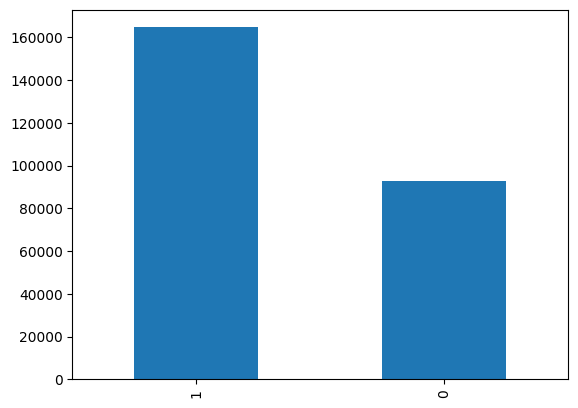

In [55]:
# Verificando a proporção entre o ataque e os dados normais
df['rótulo'].value_counts().plot.bar()

In [56]:
# Verificando a proporção entre o ataque e os dados normais
df['rótulo'].value_counts(normalize=True)

1    0.639077
0    0.360923
Name: rótulo, dtype: float64

### A proporção entre o ataque e os dados normais não é igual, mas apenas ligeiramente desequilibrada. Portanto, não faremos uma correção de amostragem.

In [57]:
# Análise de correlação entre features
corr = df.corr()
corr.style.background_gradient(cmap='PuBu')

,duração,protocolo,serviço,estado,cont. pacotes,destino,Bytes orig/dest,destino bytes,taxa transferência,tempo orig/dest,tempo dest/fonte,Bits orig p/ segundo,Bits dest p/ segundo,tempo IP orig,tempo IP dest,tremulação da fonte (mSec),tremulação de destino (mSec),janela TCP orig,seq TCP orig,seq TCP dest,tempo ida/volta TCP,tempo config TCP SYN/SYN_ACK,tempo config TCP SYN_ACK/ACK,média tam pacote src,média tam pacote dst,solic/resp http,tam real conteúdo,serv (14) orig (3),tempo de vida orig/dest,dest (3),orig (1) dest (4),dest (3) orig (2),orig (1) dest (3),login user/senha,fluxos com métodos http,orig (1),serv (14) dest (3),IP orig/dest ou porta iguais,rótulo
duração,1.000000,-0.121735,-0.006060,0.086083,0.258890,0.188382,0.204422,0.149705,-0.118622,0.008617,0.053580,-0.079202,-0.049026,0.080213,0.145803,0.140108,0.158852,0.035650,0.019954,0.021371,0.055182,0.050478,0.052618,0.088972,0.029999,0.003041,0.078497,-0.106030,0.156859,-0.080883,-0.090267,-0.088422,-0.090921,0.020390,0.023299,-0.079126,-0.107793,0.034025,0.029096
protocolo,-0.121735,1.000000,0.160227,-0.155382,0.011504,0.022497,0.005081,0.013240,0.012864,0.054950,0.104765,0.005083,0.040944,-0.565801,-0.058322,0.014101,0.015349,0.128233,0.098674,0.098581,0.066472,0.058912,0.065610,0.040677,0.068784,0.019301,0.005322,0.186643,-0.136473,0.174752,0.159938,0.146794,0.161704,0.014812,0.025970,0.155220,0.183820,-0.585964,0.008023
serviço,-0.006060,0.160227,1.000000,-0.122723,0.105653,0.073418,0.096717,0.035922,-0.124198,-0.286251,0.222648,-0.154959,-0.104082,-0.085629,-0.024881,-0.017192,0.084994,0.245319,0.203520,0.203733,0.079834,0.051729,0.101184,0.205227,0.143380,0.212544,0.059930,-0.055356,-0.196998,0.054198,0.047893,0.062755,0.005433,0.070997,0.286157,0.030642,-0.042140,-0.083364,0.073552
estado,0.086083,-0.155382,-0.122723,1.000000,-0.073824,-0.088923,-0.044936,-0.053032,0.437391,0.580814,-0.393581,0.288101,-0.140874,0.089748,-0.078586,-0.048272,-0.063081,-0.356433,-0.325805,-0.326126,-0.304950,-0.279618,-0.289995,-0.072771,-0.245072,-0.055820,-0.023273,0.382129,0.717075,0.318613,0.348906,0.381852,0.413561,-0.045125,-0.075712,0.317914,0.382398,0.089740,0.462972
cont. pacotes,0.258890,0.011504,0.105653,-0.073824,1.000000,0.383221,0.964393,0.203804,-0.073668,-0.099579,0.063234,-0.049232,0.075482,-0.016597,-0.002348,-0.001192,0.015201,0.124898,0.099473,0.096786,0.026433,0.020946,0.029008,0.209004,0.147472,0.008288,0.085979,-0.065800,-0.081957,-0.056025,-0.063234,-0.066604,-0.072036,0.010114,0.004430,-0.057480,-0.066118,-0.016565,-0.043040
destino,0.188382,0.022497,0.073418,-0.088923,0.383221,1.000000,0.184280,0.973445,-0.093065,-0.183142,0.047416,-0.062484,0.137395,-0.020490,-0.006820,-0.001411,0.048144,0.168999,0.132411,0.130523,0.008644,0.003410,0.013534,0.013921,0.426542,0.028034,0.414217,-0.073659,-0.140279,-0.065177,-0.078324,-0.084943,-0.087176,0.013203,0.039567,-0.069019,-0.073238,-0.019895,-0.097394
Bytes orig/dest,0.204422,0.005081,0.096717,-0.044936,0.964393,0.184280,1.000000,0.009969,-0.027353,-0.019939,0.058397,-0.017320,-0.007372,-0.006187,-0.000552,-0.002295,-0.003358,0.047363,0.038394,0.036309,0.031943,0.026179,0.034037,0.224094,-0.004396,0.002648,0.001631,-0.033051,-0.010485,-0.025157,-0.024496,-0.024965,-0.029291,-0.003931,-0.002900,-0.025494,-0.033095,-0.005903,0.019376
destino bytes,0.149705,0.013240,0.035922,-0.053032,0.203804,0.973445,0.009969,1.000000,-0.055538,-0.128600,0.019371,-0.037318,0.103487,-0.012459,-0.007564,-0.003541,0.041703,0.102575,0.079053,0.077746,-0.003374,-0.006773,0.001120,-0.034618,0.405260,0.029853,0.441155,-0.041784,-0.084006,-0.038026,-0.046258,-0.050583,-0.050668,-0.009145,0.042458,-0.041286,-0.041118,-0.011842,-0.060403
taxa transferência,-0.118622,0.012864,-0.124198,0.437391,-0.073668,-0.093065,-0.027353,-0.055538,1.000000,0.400967,-0.426766,0.587503,-0.148204,-0.072414,-0.051443,-0.062517,-0.084274,-0.521469,-0.414825,-0.414522,-0.281906,-0.249840,-0.278257,-0.112170,-0.268470,-0.081732,-0.022513,0.359295,0.417419,0.31

In [58]:
# Calculando a matriz de correlação
matriz_correlacao = df.corr()

# Obtendo as correlações com a coluna rótulo
correlacoes_coluna_rotulo = matriz_correlacao['rótulo'].abs().sort_values(ascending=False)

# Exibindo as colunas com maior correlação
colunas_maior_correlacao = correlacoes_coluna_rotulo[1:6]  # Seleciona as 5 colunas com maior correlação (excluindo a própria coluna rótulo)

print("Colunas com maior correlação com a coluna rótulo:")
print(colunas_maior_correlacao)

Colunas com maior correlação com a coluna rótulo:
tempo orig/dest            0.624082
tempo de vida orig/dest    0.476559
estado                     0.462972
dest (3) orig (2)          0.371672
janela TCP orig            0.364877
Name: rótulo, dtype: float64


### A coluna ‘tempo orig/dest’ refere-se ao tempo de vida da comunicação entre a origem e o destino em uma conexão de rede, e apesar dela apresentar uma correlação relativamente alta com a target, optamos por não removê-la. Isso pois, esse fator pode estar relacionado a outros problemas além da rede estar sob ataque ou não, como por exemplo, a velocidade da rede.


### Plotando os gráficos das colunas com maior correlação com a coluna 'Rótulo'

Mínimo: 0
Máximo: 255
Primeiro quartil (Q1): 62.0
Mediana (Q2): 254.0
Terceiro quartil (Q3): 254.0
Nenhum outlier encontrado.


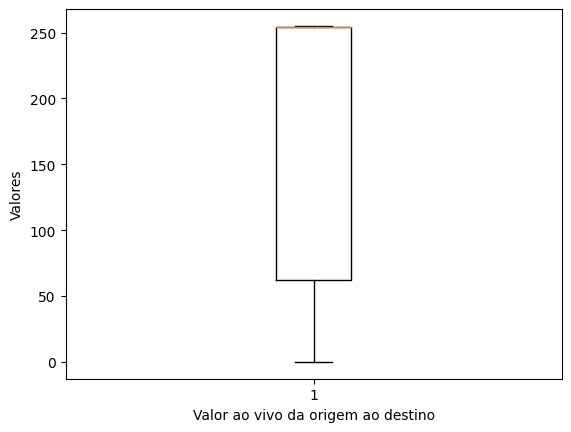

In [59]:
# Criando o boxplot
boxplot = plt.boxplot(df['tempo orig/dest'])
plt.ylabel('Valores')
plt.xlabel('Valor ao vivo da origem ao destino')

# Obtendo os valores estatísticos do boxplot
valores_min = np.min(df['tempo orig/dest'])
valores_max = np.max(df['tempo orig/dest'])
q1 = np.percentile(df['tempo orig/dest'], 25)
mediana = np.median(df['tempo orig/dest'])
q3 = np.percentile(df['tempo orig/dest'], 75)

print('Mínimo:', valores_min)
print('Máximo:', valores_max)

print('Primeiro quartil (Q1):', q1)
print('Mediana (Q2):', mediana)
print('Terceiro quartil (Q3):', q3)

# Calculando os limites dos outliers
iqr = q3 - q1
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

# Identificando os outliers
outliers = df[(df['tempo orig/dest'] < limite_inferior) | (df['tempo orig/dest'] > limite_superior)]

if len(outliers) > 0:
    print("Outliers encontrados:")
    unique_outliers = outliers.drop_duplicates(subset=['tempo orig/dest'])
    print(unique_outliers['tempo orig/dest'])
else:
    print("Nenhum outlier encontrado.")

plt.show()

Mínimo: 0
Máximo: 6
Primeiro quartil (Q1): 1.0
Mediana (Q2): 1.0
Terceiro quartil (Q3): 2.0
Outliers encontrados:
52       6
458      4
49080    5
Name: tempo de vida orig/dest, dtype: int64


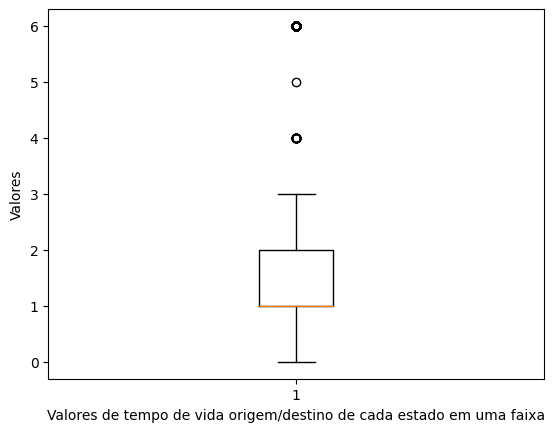

In [60]:
# Criando o boxplot
boxplot = plt.boxplot(df['tempo de vida orig/dest'])
plt.ylabel('Valores')
plt.xlabel('Valores de tempo de vida origem/destino de cada estado em uma faixa')

# Obtendo os valores estatísticos do boxplot
valores_min = np.min(df['tempo de vida orig/dest'])
valores_max = np.max(df['tempo de vida orig/dest'])
q1 = np.percentile(df['tempo de vida orig/dest'], 25)
mediana = np.median(df['tempo de vida orig/dest'])
q3 = np.percentile(df['tempo de vida orig/dest'], 75)

print('Mínimo:', valores_min)
print('Máximo:', valores_max)

print('Primeiro quartil (Q1):', q1)
print('Mediana (Q2):', mediana)
print('Terceiro quartil (Q3):', q3)

# Calculando os limites dos outliers
iqr = q3 - q1
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

# Identificando os outliers
outliers = df[(df['tempo de vida orig/dest'] < limite_inferior) | (df['tempo de vida orig/dest'] > limite_superior)]

if len(outliers) > 0:
    print("Outliers encontrados:")
    unique_outliers = outliers.drop_duplicates(subset=['tempo de vida orig/dest'])
    print(unique_outliers['tempo de vida orig/dest'])
else:
    print("Nenhum outlier encontrado.")

plt.show()

Mínimo: 0
Máximo: 10
Primeiro quartil (Q1): 4.0
Mediana (Q2): 4.0
Terceiro quartil (Q3): 5.0
Outliers encontrados:
52        7
458       0
555       2
23472     8
49080     1
20806     9
20808    10
Name: estado, dtype: int64


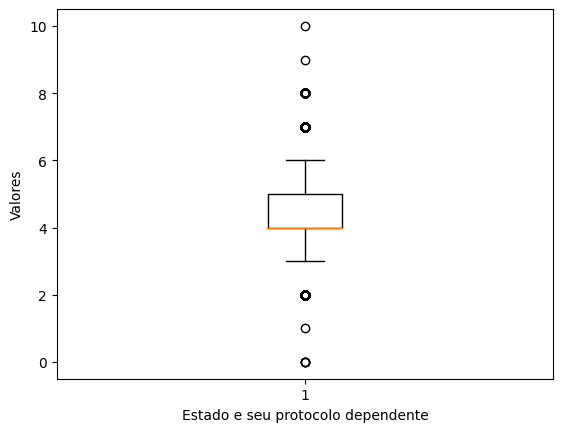

In [61]:
# Criando o boxplot
boxplot = plt.boxplot(df['estado'])
plt.ylabel('Valores')
plt.xlabel('Estado e seu protocolo dependente')

# Obtendo os valores estatísticos do boxplot
valores_min = np.min(df['estado'])
valores_max = np.max(df['estado'])
q1 = np.percentile(df['estado'], 25)
mediana = np.median(df['estado'])
q3 = np.percentile(df['estado'], 75)

print('Mínimo:', valores_min)
print('Máximo:', valores_max)

print('Primeiro quartil (Q1):', q1)
print('Mediana (Q2):', mediana)
print('Terceiro quartil (Q3):', q3)

# Calculando os limites dos outliers
iqr = q3 - q1
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

# Identificando os outliers
outliers = df[(df['estado'] < limite_inferior) | (df['estado'] > limite_superior)]

if len(outliers) > 0:
    print("Outliers encontrados:")
    unique_outliers = outliers.drop_duplicates(subset=['estado'])
    print(unique_outliers['estado'])
else:
    print("Nenhum outlier encontrado.")

plt.show()

Mínimo: 1
Máximo: 46
Primeiro quartil (Q1): 1.0
Mediana (Q2): 1.0
Terceiro quartil (Q3): 3.0
Outliers encontrados:
481      10
11929     8
11930    18
11932    14
11938     9
11944    26
11946    11
11953    16
11973    25
11975    12
11982    37
11994     7
12000    13
12009    27
12022    24
12030    21
12034    19
12036    23
12040    22
12044    15
12066    17
12077    20
12192    28
12321    33
12559    32
12582    31
12862    38
19522    46
38446    40
Name: dest (3) orig (2), dtype: int64


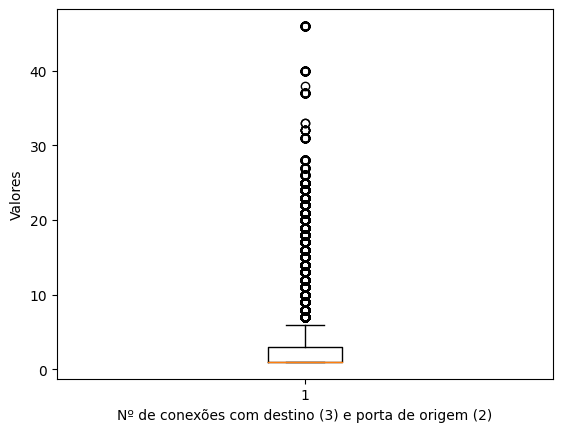

In [62]:
# Criando o boxplot
boxplot = plt.boxplot(df['dest (3) orig (2)'])
plt.ylabel('Valores')
plt.xlabel('Nº de conexões com destino (3) e porta de origem (2)')

# Obtendo os valores estatísticos do boxplot
valores_min = np.min(df['dest (3) orig (2)'])
valores_max = np.max(df['dest (3) orig (2)'])
q1 = np.percentile(df['dest (3) orig (2)'], 25)
mediana = np.median(df['dest (3) orig (2)'])
q3 = np.percentile(df['dest (3) orig (2)'], 75)

print('Mínimo:', valores_min)
print('Máximo:', valores_max)

print('Primeiro quartil (Q1):', q1)
print('Mediana (Q2):', mediana)
print('Terceiro quartil (Q3):', q3)

# Calculando os limites dos outliers
iqr = q3 - q1
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

# Identificando os outliers
outliers = df[(df['dest (3) orig (2)'] < limite_inferior) | (df['dest (3) orig (2)'] > limite_superior)]

if len(outliers) > 0:
    print("Outliers encontrados:")
    unique_outliers = outliers.drop_duplicates(subset=['dest (3) orig (2)'])
    print(unique_outliers['dest (3) orig (2)'])
else:
    print("Nenhum outlier encontrado.")

plt.show()

Mínimo: 0
Máximo: 255
Primeiro quartil (Q1): 0.0
Mediana (Q2): 0.0
Terceiro quartil (Q3): 255.0
Nenhum outlier encontrado.


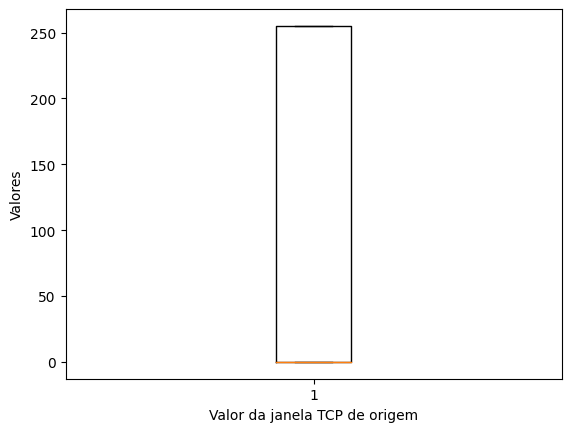

In [63]:
# Criando o boxplot
boxplot = plt.boxplot(df['janela TCP orig'])
plt.ylabel('Valores')
plt.xlabel('Valor da janela TCP de origem')

# Obtendo os valores estatísticos do boxplot
valores_min = np.min(df['janela TCP orig'])
valores_max = np.max(df['janela TCP orig'])
q1 = np.percentile(df['janela TCP orig'], 25)
mediana = np.median(df['janela TCP orig'])
q3 = np.percentile(df['janela TCP orig'], 75)

print('Mínimo:', valores_min)
print('Máximo:', valores_max)

print('Primeiro quartil (Q1):', q1)
print('Mediana (Q2):', mediana)
print('Terceiro quartil (Q3):', q3)

# Calculando os limites dos outliers
iqr = q3 - q1
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

# Identificando os outliers
outliers = df[(df['janela TCP orig'] < limite_inferior) | (df['janela TCP orig'] > limite_superior)]

if len(outliers) > 0:
    print("Outliers encontrados:")
    unique_outliers = outliers.drop_duplicates(subset=['janela TCP orig'])
    print(unique_outliers['janela TCP orig'])
else:
    print("Nenhum outlier encontrado.")

plt.show()

## Algumas possíveis explicações para a maior correlação observada entre as colunas

### 'tempo orig/dest' (Source Time to Live): Essa coluna pode estar relacionada à persistência dos pacotes enviados pela fonte. Esse é um caso muito comum em atividades maliciosas ou a determinados tipos de tráfego de rede.

### 'tempo de vida orig/dest' (Connection Tracking State Time to Live): Essa coluna indica o tempo de vida do estado de conexão. Ela pode estar associada a conexões maliciosas ou atividades de intrusão devido à sua relevância na análise de tráfego de rede e detecção de comportamentos anômalos.

### 'estado': Essa coluna indica o estado da conexão (por exemplo, 'FIN', 'SYN', 'RST', 'CON', etc.). O estado de uma conexão é uma informação importante para determinar se uma conexão é legítima ou suspeita.

### 'dest (3) orig (2)' (Count Destination Source Port Last Time): Essa coluna pode representar o número de vezes que um determinado par de porta de destino e porta de origem foi observado. Ao analisar isso, padrões incomuns de comunicação entre uma fonte e um destino específico podem ser identificados.

### 'janela TCP orig' (Source TCP Window Size): Essa coluna pode representar o tamanho da janela TCP na fonte. Pode estar associado a conexões maliciosas ou atividades de intrusão devido ao seu papel na comunicação de dados em uma conexão TCP.

# Treinando o Modelo

In [64]:
# Dividindo dataframe entre X e y
X = df.drop(columns=['rótulo'])
feature_list = list(X.columns)
X = np.array(X)
y = df['rótulo']

In [65]:
# Dividindo dados para treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [66]:
print("Dados para treino:", len(X_train))
print("Dados para teste:", len(X_test))

Dados para treino: 180371
Dados para teste: 77302


In [67]:
# Padronização dos dados usando o StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [68]:
# Definindo os modelos de classificação que serão utilizados e os armazenando em um dicionário
models = {}
models['Árvore de Decisão'] = DecisionTreeClassifier()
models['Random Forest'] = RandomForestClassifier()
models['Gaussian Naive Bayes'] = GaussianNB()

In [69]:
# Realizando o treinamento e avaliação de diferentes modelos de classificação
train_score, accuracy, precision, recall, f1, training_time, y_pred = {}, {}, {}, {}, {}, {}, {}
for key in models.keys():
    start_time = time.time() # Registrando o tempo de início do treinamento do modelo
    models[key].fit(X_train, y_train) # Realizando o treinamento do modelo específico associado à chave "key" usando os dados de treinamento (X_train) e os rótulos de treinamento (y_train).
    training_time[key] = time.time() - start_time

    y_pred[key] = models[key].predict(X_test) # Realizando a previsão do modelo específico nos dados de teste (X_test) e armazena as previsões no dicionário "y_pred"

    train_score[key] = models[key].score(X_train, y_train)
    accuracy[key] = models[key].score(X_test, y_test)
    precision[key] = precision_score(y_test, y_pred[key])
    recall[key] = recall_score(y_test, y_pred[key])
    f1[key] = f1_score(y_test, y_pred[key])

# Avaliação do Modelo

In [70]:
df_models = pd.DataFrame(index=models.keys(), columns=['Pontuação de Treinamento', 'Acurácia', 'Precisão', 'Recall', 'F1-Score', 'Tempo de Treinamento'])
df_models['Pontuação de Treinamento'] = train_score.values()
df_models['Acurácia'] = accuracy.values()
df_models['Precisão'] = precision.values()
df_models['Recall'] = recall.values()
df_models['F1-Score'] = f1.values()
df_models['Tempo de Treinamento'] = training_time.values()

In [71]:
df_models

,Pontuação de Treinamento,Acurácia,Precisão,Recall,F1-Score,Tempo de Treinamento
Árvore de Decisão,0.997782,0.936082,0.949933,0.950298,0.950116,3.888824
Random Forest,0.997782,0.949510,0.962690,0.958316,0.960498,56.235733
Gaussian Naive Bayes,0.834946,0.834920,0.842063,0.913642,0.876394,0.128636


### Com base nesses resultados, podemos concluir que o modelo Random Forest apresenta o melhor desempenho geral, com alta acurácia, precisão e F1-Score. No entanto, é importante considerar o tempo de treinamento, pois o Random Forest leva consideravelmente mais tempo para treinar. Se a velocidade de treinamento for um fator crítico, o modelo Gaussian Naive Bayes pode ser uma opção mais rápida, apesar de ter um desempenho um pouco inferior. A Árvore de Decisão também oferece um desempenho sólido, ficando entre os outros dois modelos em termos de métricas de desempenho e tempo de treinamento.